# Writing the Secret Message

Each group will be assigned to draw a specific letter, in a specific plot of paper. If everything goes to plan, the UR3e arm will write out the secret message letter by letter as each group's code runs. Each letter should be contained in a box that is 0.0342 wide and 0.0417 tall and centered at the coordinates assigned to your group. In the below example, the letter is Z and should be placed at coordinates x,y.

<img src="letter_info.png" alt="title" style="width:300px;"/>

## Coding Your Letters

Use this paper_coordinates() function to translate x,y coordinates on the page to 3D coordinates in the global frame. You will send these coordinates to the move_global() function. Check the plots to see if your letters show up as you want them to. Keep in mind that you have to move the robot arm up and down to indicate when it is drawing or moving above the paper.

[0.009600000000000011, 0.3049, 0.23, 0, 0, 0]


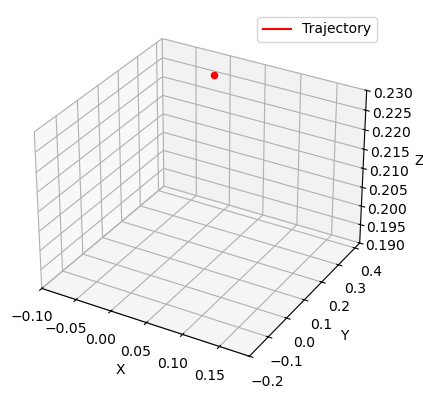

In [1]:
import rclpy
import MyUR3e
import time

rclpy.init()
myrobot = MyUR3e.MyUR3e()

# myrobot.get_logger().set_level(rclpy.logging.LoggingSeverity.DEBUG)

LEFT_TOP = [-0.0904, 0.4208, 0.22, 0, 0, 1]
LEFT_BOTTOM = [-0.0904, 0.2049, 0.217, 0, 0, 1]
RIGHT_BOTTOM = [0.1890, 0.2049, 0.217, 0, 0, 1]
RIGHT_TOP = [0.1890, 0.4208, 0.22, 0, 0, 1]

def paper_coordinates(x,y, up=True):
    cords = []
    if (x > 0.2794) or (y > 0.2159) or (x < 0) or (y < 0):
        raise RuntimeError("Your coordinates are off the paper")
    cords.append(LEFT_BOTTOM[0]+x)
    cords.append(LEFT_BOTTOM[1]+y)
    if up:
        cords.append(0.23)
    else:
        cords.append(0.22-(0.003*((0.2159-y)/0.2159)))
    
    return cords + [0, 0, 0]

# Example: Move the pen to the center of the page
point = paper_coordinates(0.1,0.1, up=True) # the up parameter determines whether the pen is touching paper or not
print(point)
myrobot.move_global([point],time_step=2,simpaper=True)

## Example: Writing the Letter V

In [ ]:
# Left leg of the flipped "v"
steps = 5
for t in range(steps):
    x = -0.005 * t + 0.1
    y = 0.01 * t + 0.1
    print(x,y)
    point = paper_coordinates(x,y, up=False)
    myrobot.move_global([point],time_step=(2,1),simpaper=True)
    
# Right leg of the flipped "v"
for t in range(steps):
    x = 0.005 * t + 0.1
    y = 0.01 * t + 0.1
    point = paper_coordinates(x,y, up=False)
    myrobot.move_global([point],time_step=(2,1),simpaper=True)

## Writing With the Robot

When its time to write your letters. Change the sim parameter from True to False!